# **Columns Description**

* **POS (Position) :** The "Position" column displays the player's ranking among all batsmen in the dataset based on specific

* **Player :** This column contains the names of the cricket players participating in the Indian Premier League (IPL).

* **Team :** This column displays the name of the team for which the player is representing during the IPL season.

* **Mat :** This column represents the number of matches in which the player has participated throughout the IPL season.

* **Inns (Innings) :** This column denotes the number of innings in which the player has batted during the IPL

* **NO (Not Outs) :** This column indicates the number of times the player remained not out after completing their inning.

* **Runs :** The "Runs" column displays the total number of runs the player has scored across all their innings during the IPL.

* **HS (Highest Score) :** This column represents the player's highest individual score in a single inning during the IPL season.

* **Avg (Average) :** The "Average" column calculates the player's batting average, which is the total runs scored divided number of innings played.

* **BF (Balls Faced) :** This column indicates the total number of balls faced by the player across all their innings in the IPL season.

* **SR (Strike Rate) :** The "Strike Rate" column represents the player's strike rate, which is calculated as (Runs / Balls Faced)

* **100 :** This column indicates the number of centuries (100 or more runs in a single inning) the player has scored.

* **50 :** The "50" column denotes the number of half-centuries (50 to 99 runs in a single inning) the player has scored during the IPL.

* **4s (Fours) :** This column displays the total number of boundaries hit by the player, specifically fours (balls that reach the boundary with one or more number of bounces on the ground).

* **6s (Sixes) :** The "Sixes" column represents the total number of maximums hit by the player, where the balls reach the boundary without any bounce in the ground.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/kaggle/input/ipl-all-time-best-batsman/All-Time-Best-Batsman.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     135 non-null    int64  
 1   Player  135 non-null    object 
 2   Team    135 non-null    object 
 3   Mat     135 non-null    int64  
 4   Inns    135 non-null    int64  
 5   NO      135 non-null    int64  
 6   Runs    135 non-null    int64  
 7   HS      135 non-null    object 
 8   Avg     135 non-null    float64
 9   BF      135 non-null    int64  
 10  SR      135 non-null    float64
 11  100     135 non-null    int64  
 12  50      135 non-null    int64  
 13  4s      135 non-null    int64  
 14  6s      135 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 15.9+ KB


In [36]:
# Check for Duplicates

df.duplicated().sum()

0

In [37]:
# Check for NULL Vaues

df.isna().sum()

POS           0
Player        0
Team          0
Mat           0
Inns          0
NO            0
Runs          0
Avg           0
BF            0
SR            0
100           0
50            0
4s            0
6s            0
Not_Out_HS    0
HS_int        0
dtype: int64

> **Transforming Data in Dataset :**

In [25]:
# Create new feature named 'Not_Out_HS'
# Contains 'Yes' if out in Highest Score match at the end
# Else 'No'

def return_status(s):
    if s.endswith('*'):
        return 'No'
    else:
        return 'Yes'

df['Not_Out_HS'] = df['HS'].map(return_status)

In [26]:
# Create new Fature names 'HS_int'
# Contains Highest Score converted to int dtype 

def return_HS_int(s):
    if s.endswith('*'):
        return int(s.replace('*',''))
    else:
        return int(s)

df['HS_int'] = df['HS'].map(return_HS_int)

In [27]:
# Drop the 'HS' column

df.drop('HS', axis=1, inplace=True)

In [28]:
# Use Label Encoding to Encode the Data in Categorical Columns

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [29]:
# Encode the Text Categorical Data

df['Team'] = labelEncoder.fit_transform(df['Team'])

df['Not_Out_HS'] = labelEncoder.fit_transform(df['Not_Out_HS'])

> **Visualization of Data :**

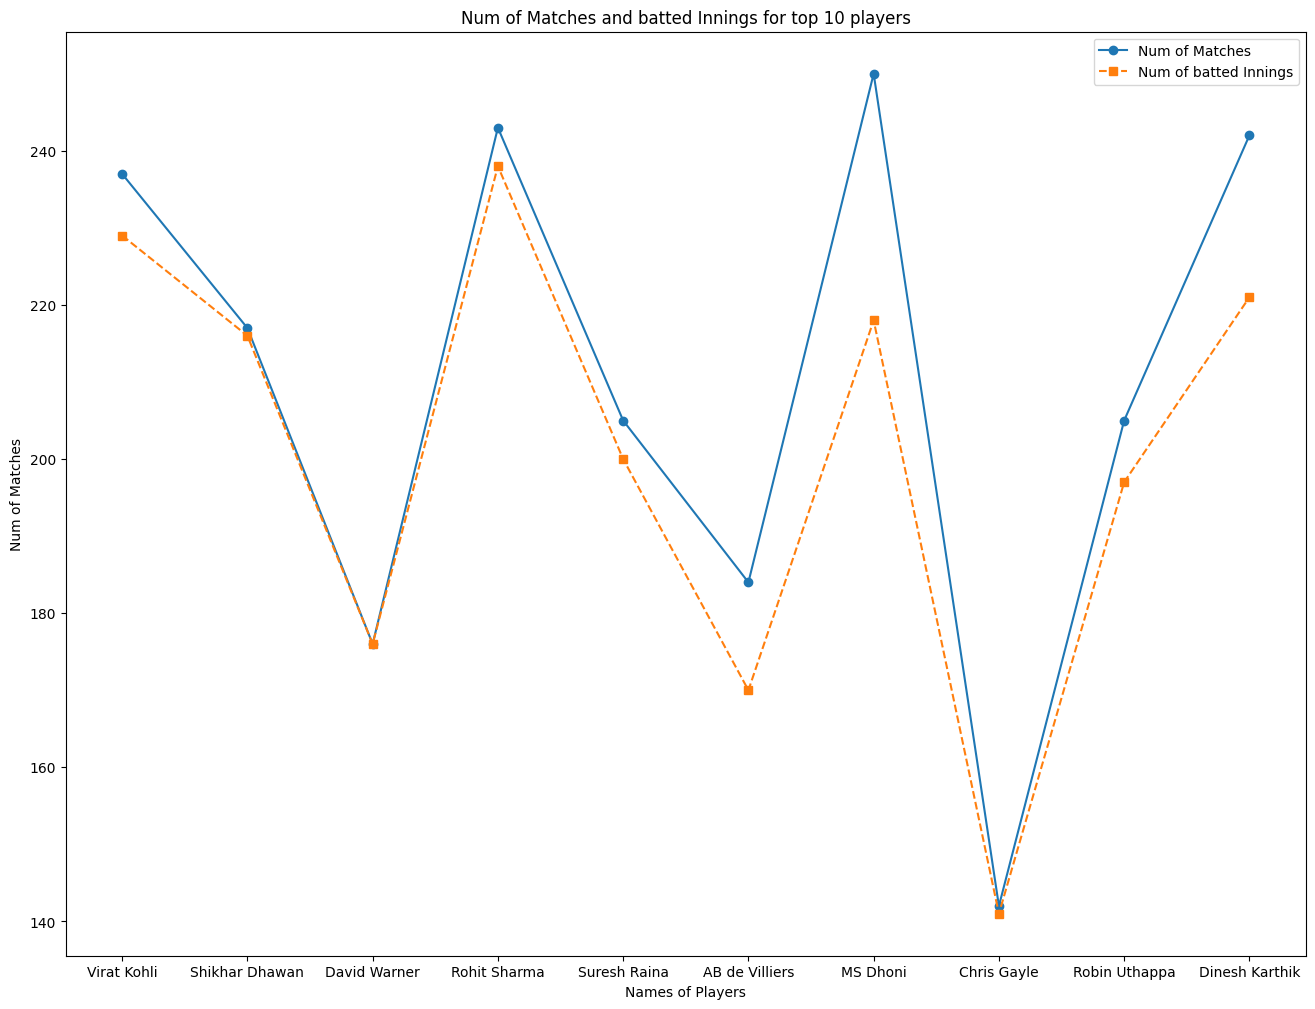

In [32]:
top10players = df.sort_values(by='POS',ascending=True).head(10)

# Create the plot
plt.figure(figsize=(16, 12))  # Adjust the figure size as needed

# Plot the first line
plt.plot(top10players['Player'], top10players['Mat'], label='Num of Matches', marker='o', linestyle='-')

# Plot the second line
plt.plot(top10players['Player'], top10players['Inns'], label='Num of batted Innings', marker='s', linestyle='--')

# Add labels and a legend
plt.xlabel('Names of Players')
plt.ylabel('Num of Matches')
plt.title('Num of Matches and batted Innings for top 10 players')
plt.legend()

# Show the plot
plt.show()


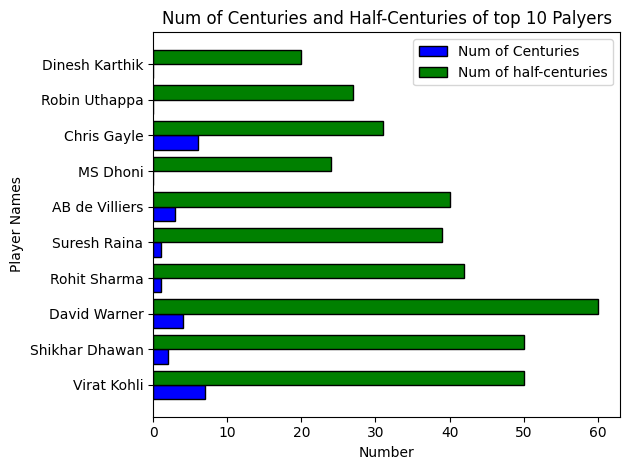

In [33]:
# Create an index for the y-axis
y = np.arange(10)

# Set the width of the bars
bar_width = 0.4

# Create the horizontal bar chart for the first set of data
plt.barh(y, top10players['100'], bar_width, label='Num of Centuries', color='b', edgecolor='black')

# Create the horizontal bar chart for the second set of data
plt.barh(y + bar_width, top10players['50'], bar_width, label='Num of half-centuries', color='g', edgecolor='black')

# Customize the y-axis labels
plt.yticks(y + bar_width / 2, top10players['Player'])

# Add labels and a legend
plt.xlabel('Number')
plt.ylabel('Player Names')
plt.title('Num of Centuries and Half-Centuries of top 10 Palyers')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

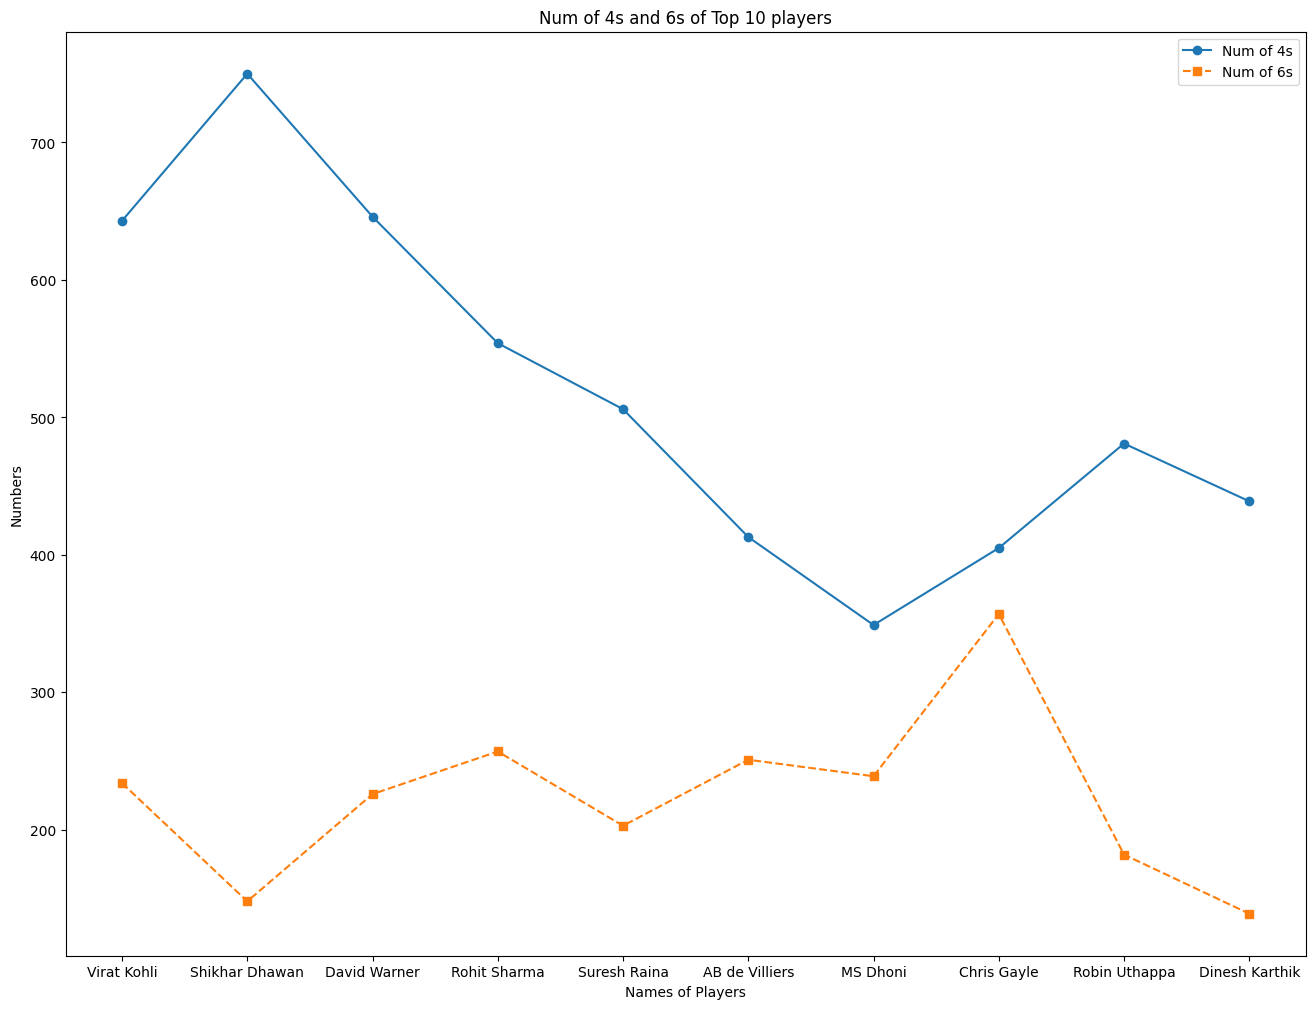

In [34]:
# Create the plot
plt.figure(figsize=(16, 12))  # Adjust the figure size as needed

# Plot the first line
plt.plot(top10players['Player'], top10players['4s'], label='Num of 4s', marker='o', linestyle='-')

# Plot the second line
plt.plot(top10players['Player'], top10players['6s'], label='Num of 6s', marker='s', linestyle='--')

# Add labels and a legend
plt.xlabel('Names of Players')
plt.ylabel('Numbers')
plt.title('Num of 4s and 6s of Top 10 players')
plt.legend()

# Show the plot
plt.show()

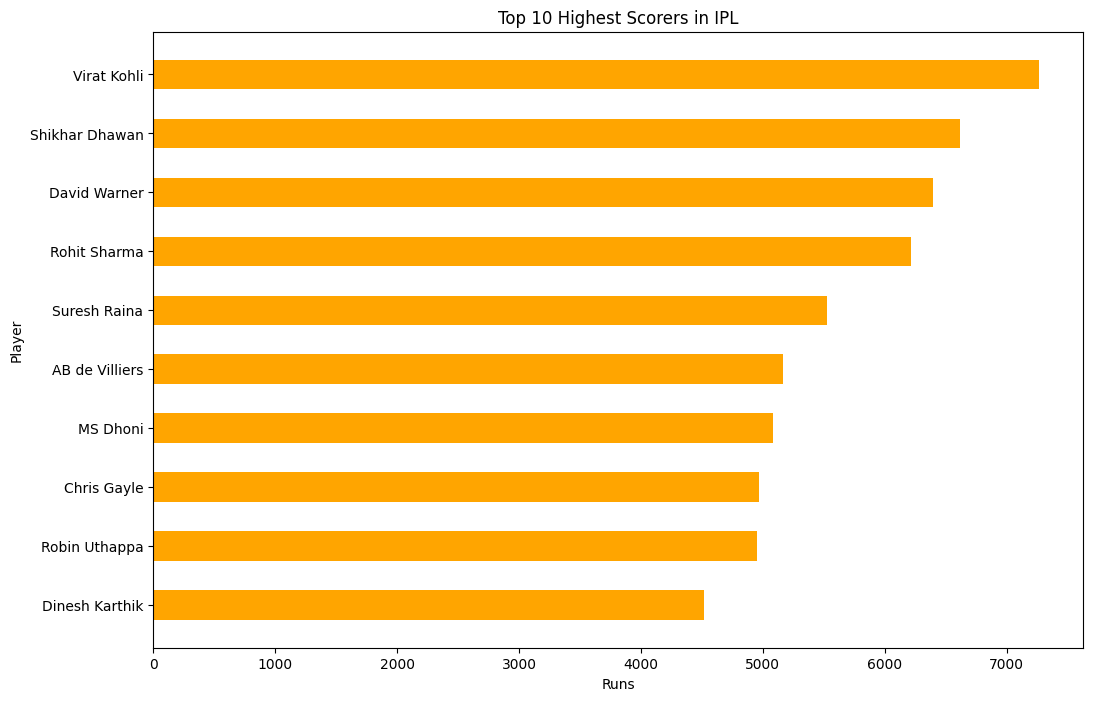

In [35]:
plt.figure(figsize=(12, 8))
plt.barh(top10players['Player'], top10players['Runs'], height=0.5, color='orange')
plt.xlabel('Runs')
plt.ylabel('Player')
plt.title('Top 10 Highest Scorers in IPL')
plt.gca().invert_yaxis()
plt.show()